In [1]:
import re
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
data = pd.read_csv("Label analisis.csv", sep=";")

In [2]:
data

,text,label,label angka
0,kartu vaksin tidak bisa unduh aplikasi kartu s...,Negatif,-1
1,sengaja kasih bisa baca semua orang unduh apli...,Negatif,-1
2,jelek susah verifikasi klik kadang muncul gamb...,Negatif,-1
3,captcha salah sudah centang hijau tetap ada tu...,Negatif,-1
4,login sudah masuk nomor telepon alamat email t...,Negatif,-1
...,...,...,...
1528,captcha salah sudah benar komputer jaring kiri...,Negatif,-1
1529,aplikasi mental tidak bisa buka solusi penting...,Negatif,-1
1530,aplikasi buat bisa terima ada bukti sudah vaks...,Positif,1
1531,tidak bisa masuk akun lancar susah tambah lemo...,Negatif,-1


In [3]:
#cek missing data
data.isna().sum()

text           0
label          0
label angka    0
dtype: int64

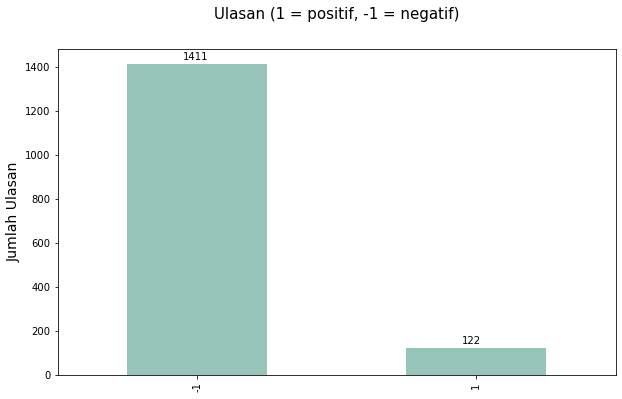

In [4]:
#grafik ulasan
a = data['label angka'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=10, color='#97C4B8')
a.set_title('Ulasan (1 = positif, -1 = negatif)', size=15, pad=30)
a.set_ylabel('Jumlah Ulasan', fontsize=14)

for i in a.patches:
    a.text(i.get_x() + 0.2, i.get_height() + 20, str(round(i.get_height(), 2)), fontsize=10)

In [5]:
#memasukkan data ke variabel
x = data.iloc[:,0]
y = data.iloc[:,-2]

In [6]:
x

0       kartu vaksin tidak bisa unduh aplikasi kartu s...
1       sengaja kasih bisa baca semua orang unduh apli...
2       jelek susah verifikasi klik kadang muncul gamb...
3       captcha salah sudah centang hijau tetap ada tu...
4       login sudah masuk nomor telepon alamat email t...
                              ...                        
1528    captcha salah sudah benar komputer jaring kiri...
1529    aplikasi mental tidak bisa buka solusi penting...
1530    aplikasi buat bisa terima ada bukti sudah vaks...
1531    tidak bisa masuk akun lancar susah tambah lemo...
1532    bintang bicara betapa buruk aplikasi kasih bis...
Name: text, Length: 1533, dtype: object

In [7]:
y

0       Negatif
1       Negatif
2       Negatif
3       Negatif
4       Negatif
         ...   
1528    Negatif
1529    Negatif
1530    Positif
1531    Negatif
1532    Negatif
Name: label, Length: 1533, dtype: object

In [8]:
#menghitung jumlah pos neg pada var y
y.value_counts()

Negatif    1411
Positif     122
Name: label, dtype: int64

In [9]:
#mengubah pos neg menjadi 0 1
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
y = Encoder.fit_transform(y)

In [10]:
#membagi data latih(train) dan data uji(test)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0,test_size= 0.2)

In [11]:
x_train.shape

(1226,)

In [12]:
x_test.shape

(307,)

In [13]:
y_train.shape

(1226,)

In [14]:
y_test.shape

(307,)

In [15]:
#jumlah var y
np.bincount(y_train)

array([1134,   92], dtype=int64)

In [16]:
#ekstraksi fitur (tf-idf)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train) #mengubah x_train dengan form yang baru menggunakan vectorizer
x_test = vectorizer.transform(x_test)

### XGBOOST

In [17]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)

In [18]:
model = XGBClassifier()
model.fit(x_train,y_train)
y_pred_valxg = model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
acc_xg = accuracy_score(y_test,y_pred_valxg)
auc_xg = roc_auc_score(y_test, y_pred_valxg)
print("Accuracy : ", acc_xg)
print("AUC : ", auc_xg)
print(classification_report(y_test,y_pred_valxg))
pd.crosstab(y_test,y_pred_valxg)

Accuracy :  0.9348534201954397
AUC :  0.7558363417569193
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.73      0.53      0.62        30

    accuracy                           0.93       307
   macro avg       0.84      0.76      0.79       307
weighted avg       0.93      0.93      0.93       307



col_0,0,1
row_0,,
0,271,6
1,14,16


### XGBOOST SMOTE

In [19]:
sm = SMOTE()

x_sm, y_sm = sm.fit_resample(x_train, y_train)

In [20]:
np.bincount(y_sm)

array([1134, 1134], dtype=int64)

In [21]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)

In [22]:
modelsm = XGBClassifier()
modelsm.fit(x_sm, y_sm)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
y_pred_valsm = modelsm.predict(x_test)
auc_sm = roc_auc_score(y_test, y_pred_valsm)
acc_sm = accuracy_score(y_test,y_pred_valsm)
print("Accuracy : ", acc_sm)
print("AUC : ", auc_sm)
print(classification_report(y_test,y_pred_valsm))

Accuracy :  0.9478827361563518
AUC :  0.822503008423586
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       277
           1       0.77      0.67      0.71        30

    accuracy                           0.95       307
   macro avg       0.87      0.82      0.84       307
weighted avg       0.95      0.95      0.95       307



<AxesSubplot:>

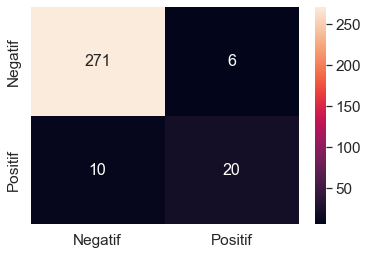

In [24]:
from sklearn import metrics
import seaborn as sns
import matplotlib as plt
#confusion matrix
cm_array = metrics.confusion_matrix(y_test, y_pred_valsm)
df_cm = pd.DataFrame(cm_array,
                     index=["Negatif", "Positif"],
                     columns=["Negatif", "Positif"])
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size